In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import matplotlib.dates as mdates

In [2]:
#d= pd.read_csv("Dataset/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")
#mini2017=d.sample(frac=0.1,replace=False)
df= pd.read_csv("Dataset/Sample_data_2017.csv")

In [3]:
df.describe()

,Unnamed: 0,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Date First Observed,Law Section,Unregistered Vehicle?,Vehicle Year,Feet From Curb,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
count,1.080303e+06,1.080303e+06,1.080303e+06,1.080303e+06,1.080303e+06,1.080303e+06,1.080303e+06,873266.000000,1.080303e+06,1.080303e+06,1.080303e+06,1.080303e+06,1.080303e+06,112767.0,1.080303e+06,1.080303e+06,0.0,0.0,0.0
mean,5.401452e+06,6.818122e+09,3.461241e+01,2.390353e+04,2.033486e+04,2.035712e+04,2.443089e+07,55.721859,4.504292e+01,4.685626e+01,3.367209e+05,4.528320e+05,5.510315e+02,0.0,1.577627e+03,1.203033e-01,NaN,NaN,NaN
std,3.118299e+06,2.319962e+09,1.936081e+01,2.268561e+04,2.195684e+04,2.201363e+04,2.603715e+07,37.948849,4.056022e+01,6.284610e+01,2.251698e+05,2.987671e+06,2.949422e+02,0.0,8.258583e+02,8.306136e-01,NaN,NaN,NaN
min,3.000000e+00,1.005796e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.080000e+02,0.0,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,2.698830e+06,5.092139e+09,2.000000e+01,5.580000e+03,0.000000e+00,0.000000e+00,2.016072e+07,19.000000,7.000000e+00,1.000000e+00,3.452390e+05,0.000000e+00,4.080000e+02,0.0,1.999000e+03,0.000000e+00,NaN,NaN,NaN
50%,5.400424e+06,8.107023e+09,3.600000e+01,1.813000e+04,1.383000e+04,1.383000e+04,2.017083e+07,50.000000,3.300000e+01,2.800000e+01,3.581730e+05,0.000000e+00,4.080000e+02,0.0,2.008000e+03,0.000000e+00,NaN,NaN,NaN
75%,8.102304e+06,8.485911e+09,4.000000e+01,3.549000e+04,3.391000e+04,3.399000e+04,2.018072e+07,90.000000,7.800000e+01,7.800000e+01,3.631380e+05,0.000000e+00,4.080000e+02,0.0,2.014000e+03,0.000000e+00,NaN,NaN,NaN
max,1.080303e+07,8.585600e+09,9.900000e+01,9.802000e+04,9.826000e+04,9.828000e+04,8.888889e+07,878.000000,8.780000e+02,9.940000e+02,9.999920e+05,2.022061e+07,1.180000e+03,0.0,2.069000e+03,1.600000e+01,NaN,NaN,NaN


### Checking data types of all the features

In [4]:
df.dtypes

Unnamed: 0                             int64
Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation 

NY    343387
K     221806
Q     184126
BX    136067
BK     87849
QN     67632
ST     13711
R      12186
MN      9574
Name: Violation County, dtype: int64


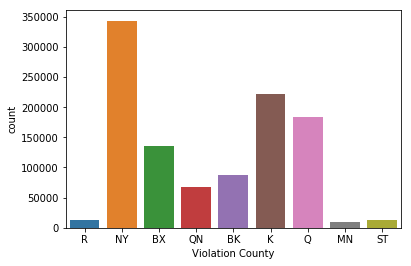

In [5]:
cntof='Violation County'
print(df[cntof].value_counts())
sns.countplot(df[cntof])
plt.show()

In [8]:
#df.isnull().sum()
df['Issue Date']=pd.to_datetime(df['Issue Date'])

In [9]:
df['Issue Month']=[i.month for i in df['Issue Date']]
df['Issue Day']=[i.day for i in df['Issue Date']]
df['Issue Year']=[i.year for i in df['Issue Date']]

6     110081
5     102237
10     96716
3      96624
9      96327
11     89535
4      89240
1      88182
2      82563
8      80334
12     78265
7      70199
Name: Issue Month, dtype: int64


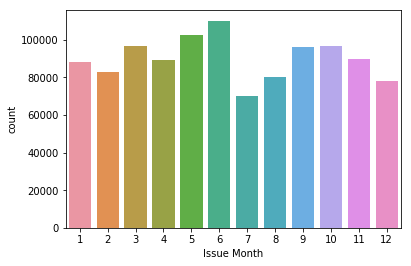

In [10]:
cntof='Issue Month'
print(df[cntof].value_counts())
sns.countplot(df[cntof])
plt.show()

In [11]:
for time in range(len(df['Violation Time'])):
    s=df['Violation Time'][time]
    df['Violation Time'][time]=s[:2]+':'+s[2:]
    df['Violation Time'][time]=pd.to_datetime(df['Violation Time'][time])
df['Violation Time']

C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


KeyboardInterrupt: 